## Propagation Diagrams for 40Msun Model

In [1]:
%matplotlib inline
#plt.style.use('/Users/mcantiello/.matplotlib/mesa.mplstyle')


import matplotlib.pyplot as plt
import mesa_reader as mr
import numpy as np
from pylab import *
from math import log10, pi
from matplotlib import rc
#rc('mathtext', default='regular')
import matplotlib as mpl
import matplotlib.tri as tri

import matplotlib.transforms as mtransforms
from matplotlib.ticker import MaxNLocator
from scipy import interpolate
from scipy.interpolate import griddata


from numpy import loadtxt
import pandas as pd 
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec

    
from Constants import Constants
c=Constants() 

# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

Constants defined...


In [2]:
####################################################
# Plt Options from Perna, Lazzati & Cantiello 2017 #
####################################################
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.family'] = ['Times New Roman']
#plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['legend.borderpad'] = 0.2
#plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
plt.rc('legend', borderpad=0.2, markerscale=1., fancybox=False)
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
####################################################

In [3]:
rsun=6.9598e10
msun=1.9892e33
lsun=3.8418e33
tsun = 5777
G=6.67428e-8 

In [4]:
def find_zams(logl,loglh,model):
    zams=1
    while (loglh[zams] < 1.0*logl[zams]): 
     zams=zams+1
    return zams; 

def find_h(dh,center_h1,model):
    zams=1
    while (center_h1[zams] > (center_h1[1] - dh)): 
     zams=zams+1
    return zams; 
    
def find_tams(center_h1,model):
    tams=1
    while (center_h1[tams] > 0.05): 
     tams=tams+1
    return tams;    

def find_max(a,b,c,d):
    z= [0] * len(a)
    for i in range(0, len(a)):
      z[i]=max(a[i],b[i],c[i],d[i])   
    return z;

def binary(z):  
    for i in range(0, len(z)):
      if z[i] > 0:
         z[i] = 1
      else: 
         z[i] = 0
    return z;

def pbeta(p,b):    # Plasma Beta
    beta= 8*3.1415*p/(b**2.0)
    return beta;

def rossby(vcon,vroteq,hp,req): # Rossby number, defined as Prot/Pcon
    ross =(3.14*req/hp)*(vcon/veq)
    return ross; 
def beq(vcon,rho): # Calculate equipartition Bfield
    b=vcon*(4*3.14*rho)**0.5
    return b;
def char_freq(vcon,hp,req): # Rossby number, defined as Prot/Pcon
    ross =(3.14*req/hp)*(vcon/veq)
    return ross; 

In [5]:
def k_h(ell,radius):    # Calculate horizontal wavenumber of  IGWs
    kh = ((ell * (ell+1))**0.5)/radius
    return kh;

def k_r(ell,brunt,omega,radius):    # Calculate radial wavenumber of  IGWs
    a = brunt * (ell * ( ell + 1))**0.5
    b = (omega * radius)
    kr = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return kr;

def vg_r(ell,brunt,omega,radius):    # Calculate horizontal wavenumber of  IGWs
    a = radius * omega**2.0
    b = brunt * (ell * (ell+1))**0.5  
    kh = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return vg_r;

def xi_r(ell,brunt,omega,radius, rho, figw): # Calculate radial displacement from IGWs with flux Figw
    xir = 2.0*figw*(ell *( ell + 1))**0.5
    xir = xir / (radius * rho * omega**2.0)
    xir = xir / (brunt**2.0 - omega**2.0)**0.5
    xir = xir**0.5
    return xir;

def lamb_ell(lamb1,ell):         # Return Lamb_ell Given Lamb_1
    lambell=lamb1*(ell*(ell+1)/2)**0.5
    return lambell;

#def xi_r(ell,brunt,omega,radius, rho, figw): # Calculate radial displacement from IGWs with flux Figw
#    xir = 2.0*figw*(ell *( ell + 1))**0.5
#    xir = xir / (radius * rho * omega**2.0)
#    xir = xir / brunt
#    xir = xir**0.5
#    return xir;


In [8]:
DIR = '.'
mods = [5.0, 5.2, 5.4 ,5.6 ,5.8, 6.0, 7.0,8.0,9.0,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,40,50,60,80,100,120]
hrdlines = [5.0,6.0,7.0,9.0,11,13,15,20,25,30,40,60,80,120]
figures = '/Users/mcantiello/Dropbox (Personal)/work/red_noise/figures/'

1.2827769742403514


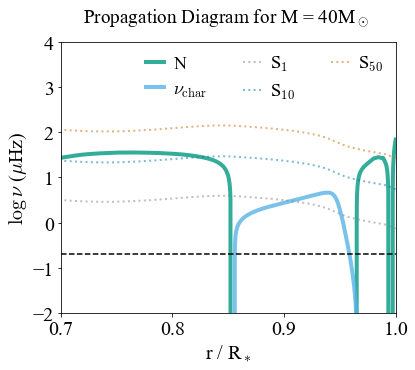

In [25]:
mesa=mr.MesaData(DIR+'/LOGS/h1_0.6.data')
mesa=mr.MesaData(DIR+'/LOGS/profile18.data')
dir(mesa)
mesa.bulk_names

pi2= 2*3.1415

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))
#lamb_S2 ! for l=1: S = 2*(csound/r)^2
# lamb_S ! for l=1: S = sqrt(2)*csound/r
muhz=1e-6 #conversion factor from muhz to hz

brunt=(1e6/pi2)*10**mesa.log_brunt_N
lamb1=(1e6/pi2)*mesa.lamb_S


lamb10=lamb_ell(lamb1,10)
lamb50=lamb_ell(lamb1,50)
lamb100=lamb_ell(lamb1,100)
lamb300=lamb_ell(lamb1,300)

plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=4, alpha=0.8,label = r'N',color=BLUE_GREEN)

## Calculate Omega (nu_char)
# Extract Omega:
# Calculate turnover timescale
vc=10**mesa.log_conv_vel
alpha_mlt = 1.6
hp=mesa.pressure_scale_height 
turnover=2*alpha_mlt*hp*rsun/vc     # 2 Lambda / vc

nu_char=1.0/(2*3.1415*turnover)     # Definition in Bowman et al. 2020

omega=vc/(2*alpha_mlt*hp*rsun)      # definition from Fuller et al. 2014 (there is a 2 here)

## Identify values in the core
i=len(vc)-1
while (vc[i] > 0.00001):
    i=i-1
omega_core=np.mean(omega[i:])   
i_core = i
print(omega_core/muhz)    
##

#plt.plot(mesa.radius/mesa.radius[1],np.log10(omega/muhz),linewidth=4, alpha=0.8,label = r'$\omega$',color=RED_PURPLE)
plt.plot(mesa.radius/mesa.radius[1],np.log10(nu_char/muhz),linewidth=4, alpha=0.8,label = r'$\nu_{\rm char}$',color=SKY_BLUE)

plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, ls=':', alpha=0.5,label = r'S$_1$',color='gray')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb10),linewidth=2, ls=':',alpha=0.5,label = r'S$_{10}$',color=BLUE)
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb50),linewidth=2, ls=':',alpha=0.5,label = r'S$_{50}$',color=VERMILLION)
#plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb30),linewidth=2, alpha=0.8,label = r'  S$_{30}$')
#plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb300),linewidth=2, alpha=0.8,label = r'S$_{\ell = 300}$')
plt.axhline(y=np.log10(omega_core/(pi2*muhz)), color=BLACK, linestyle='--')

legend = plt.legend(loc='upper right',fontsize=18,ncol=3)

plt.axis([0.7,1, -2,4])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log\, \nu$ ($\mu$Hz)')
plt.title(r'Propagation Diagram for M = 40M$_\odot$ ') #X$_c$=0.68
plt.savefig("Propagation10Msun_zoom.pdf",bbox_inches='tight')


2.8954010918886577


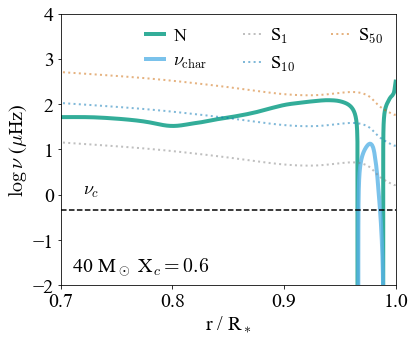

In [19]:
mesa=mr.MesaData(DIR+'/LOGS/h1_0.6.data')
dir(mesa)
mesa.bulk_names

pi2= 2*3.1415

# Units of brunt in MESA? 
#log_brunt_nu(k) = safe_log10_cr((1d6/(2*pi))*sqrt(max(0d0,s% brunt_N2(k))))
#lamb_S2 ! for l=1: S = 2*(csound/r)^2
# lamb_S ! for l=1: S = sqrt(2)*csound/r
muhz=1e-6 #conversion factor from muhz to hz

brunt=(1e6/pi2)*10**mesa.log_brunt_N
lamb1=(1e6/pi2)*mesa.lamb_S


lamb10=lamb_ell(lamb1,10)
lamb50=lamb_ell(lamb1,50)
lamb100=lamb_ell(lamb1,100)
lamb300=lamb_ell(lamb1,300)

plt.plot(mesa.radius/mesa.radius[1],np.log10(brunt),linewidth=4, alpha=0.8,label = r'N',color=BLUE_GREEN)

## Calculate Omega (nu_char)
# Extract Omega:
# Calculate turnover timescale
vc=10**mesa.log_conv_vel
alpha_mlt = 1.6
hp=mesa.pressure_scale_height 
turnover=2*alpha_mlt*hp*rsun/vc     # 2 Lambda / vc

nu_char=1.0/(2*3.1415*turnover)     # Definition in Bowman et al. 2020

omega=vc/(2*alpha_mlt*hp*rsun)      # definition from Fuller et al. 2014 (there is a 2 here)

## Identify values in the core
i=len(vc)-1
while (vc[i] > 0.00001):
    i=i-1
omega_core=np.mean(omega[i:])   
i_core = i
print(omega_core/muhz)    
##

#plt.plot(mesa.radius/mesa.radius[1],np.log10(omega/muhz),linewidth=4, alpha=0.8,label = r'$\omega$',color=RED_PURPLE)
plt.plot(mesa.radius/mesa.radius[1],np.log10(nu_char/muhz),linewidth=4, alpha=0.8,label = r'$\nu_{\rm char}$',color=SKY_BLUE)

plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb1),linewidth=2, ls=':', alpha=0.5,label = r'S$_1$',color='gray')
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb10),linewidth=2, ls=':',alpha=0.5,label = r'S$_{10}$',color=BLUE)
plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb50),linewidth=2, ls=':',alpha=0.5,label = r'S$_{50}$',color=VERMILLION)
#plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb30),linewidth=2, alpha=0.8,label = r'  S$_{30}$')
#plt.plot(mesa.radius/mesa.radius[1],np.log10(lamb300),linewidth=2, alpha=0.8,label = r'S$_{\ell = 300}$')
plt.axhline(y=np.log10(omega_core/(pi2*muhz)), color=BLACK, linestyle='--')
plt.annotate(r'$\nu_c$',xy=(0.72,0),fontsize=18)
plt.annotate(r'40 M$_\odot$ X$_c = 0.6$',xy=(0.71,-1.7),fontsize=20)
legend = plt.legend(loc='upper right',fontsize=18,ncol=3)

plt.axis([0.7,1, -2,4])
plt.xlabel(r'r / R$_*$')
plt.ylabel(r'$\log\, \nu$ ($\mu$Hz)')
#plt.title(r'Propagation Diagram for M = 40M$_\odot$ ') #X$_c$=0.6
plt.savefig("Propagation10Msun_zoom.pdf",bbox_inches='tight')
